In [2]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from __future__ import division
from sklearn.cluster import KMeans

In [3]:
import plotly.graph_objs as py
import plotly.offline as pyoff
import plotly.graph_objs as go

In [4]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [6]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split

In [7]:
pyoff.init_notebook_mode()

In [8]:
df_data = pd.read_csv('https://raw.githubusercontent.com/nhitrann203/tinh314/main/TeleX-Customer-Churn.csv')

In [9]:
df_data.head(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   
5  9305-CDSKC  Female              0      No         No       8          Yes   
6  1452-KIOVK    Male              0      No        Yes      22          Yes   
7  6713-OKOMC  Female              0      No         No      10           No   
8  7892-POOKP  Female              0     Yes         No      28          Yes   
9  6388-TABGU    Male              0      No        Yes      62          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   
5               Yes     Fiber optic             No  ...              Yes   
6               Yes     Fiber optic             No  ...               No   
7  No phone service             DSL            Yes  ...               No   
8               Yes     Fiber optic             No  ...              Yes   
9                No             DSL            Yes  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   
5          No         Yes             Yes  Month-to-month              Yes   
6          No         Yes              No  Month-to-month              Yes   
7          No          No              No  Month-to-month               No   
8         Yes         Yes             Yes  Month-to-month              Yes   
9          No          No              No        One year               No   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95       1889.50    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  
5           Electronic check          99.65        820.50   Yes  
6    Credit card (automatic)          89.10       1949.40    No  
7               Mailed check          29.75        301.90    No  
8           Electronic check         104.80       3046.05   Yes  
9  Bank transfer (automatic)          56.15       3487.95    No  

[10 rows x 21 columns]

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df_data.loc[df_data.Churn=='No','Churn'] = 0 
df_data.loc[df_data.Churn=='Yes','Churn'] = 1

In [12]:
df_data.groupby('gender').Churn.mean()

gender
Female    0.269209
Male      0.261603
Name: Churn, dtype: object

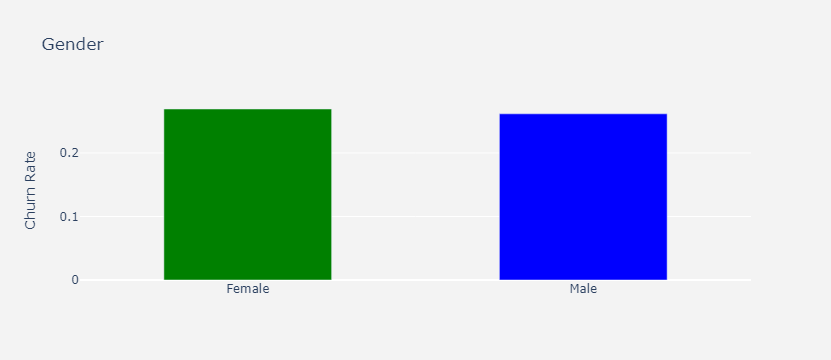

In [13]:
df_plot = df_data.groupby('gender').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['gender'],
        y=df_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Gender',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Female customers are more likely to churn vs. male customers, but the difference is minimal (~0.8%).

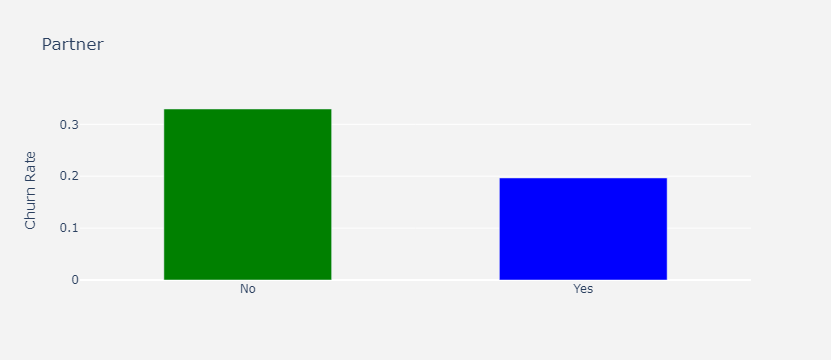

In [14]:
df_plot = df_data.groupby('Partner').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Partner'],
        y=df_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Partner',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

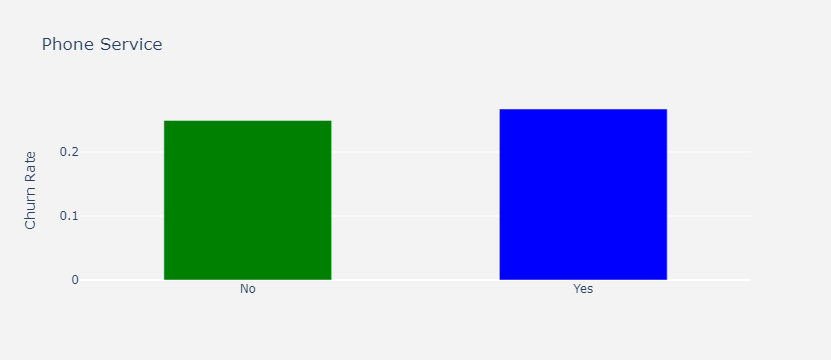

In [15]:
df_plot = df_data.groupby('PhoneService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['PhoneService'],
        y=df_plot['Churn'],
        width = [0.5, 0.5],
        marker=dict(
        color=['green', 'blue'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Phone Service',
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
        
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

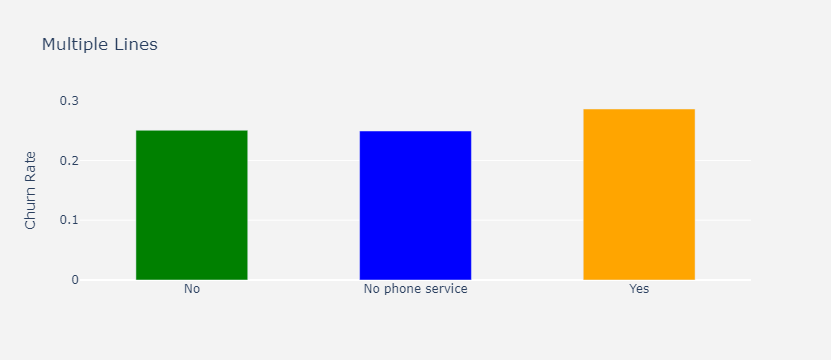

In [16]:
df_plot = df_data.groupby('MultipleLines').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['MultipleLines'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Multiple Lines',
        yaxis={"title": "Churn Rate"},
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

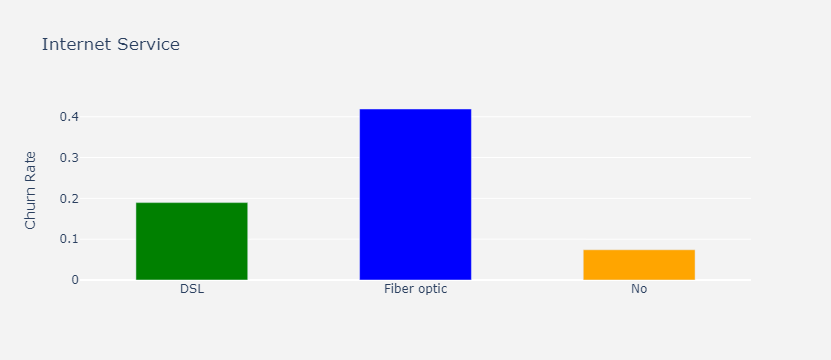

In [17]:
df_plot = df_data.groupby('InternetService').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['InternetService'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Internet Service',
        yaxis={"title": "Churn Rate"},
        plot_bgcolor  = 'rgb(243,243,243)',
        paper_bgcolor  = 'rgb(243,243,243)',
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

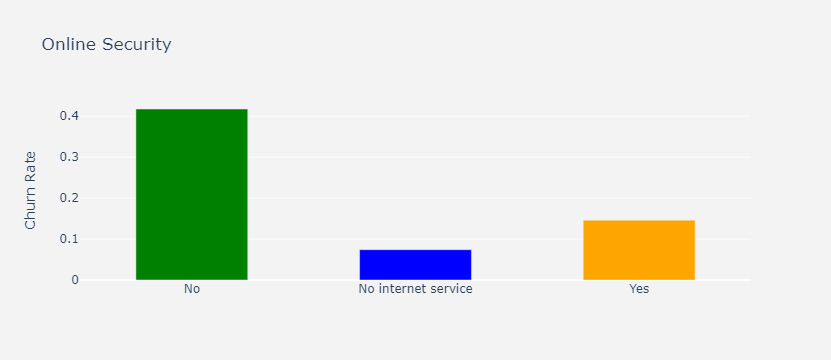

In [18]:
df_plot = df_data.groupby('OnlineSecurity').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['OnlineSecurity'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        yaxis={"title": "Churn Rate"},
        title='Online Security',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

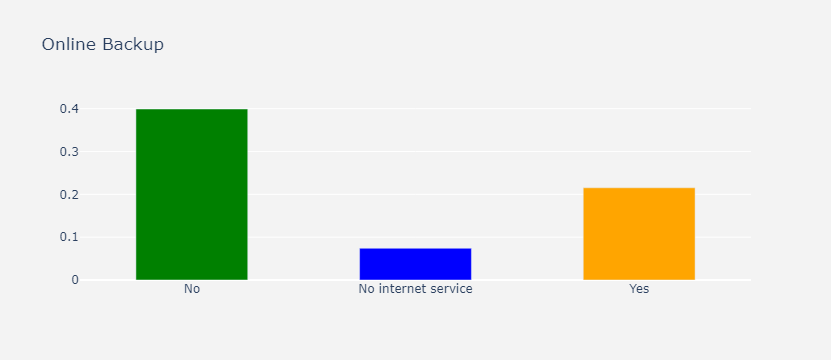

In [19]:
df_plot = df_data.groupby('OnlineBackup').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['OnlineBackup'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Online Backup',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

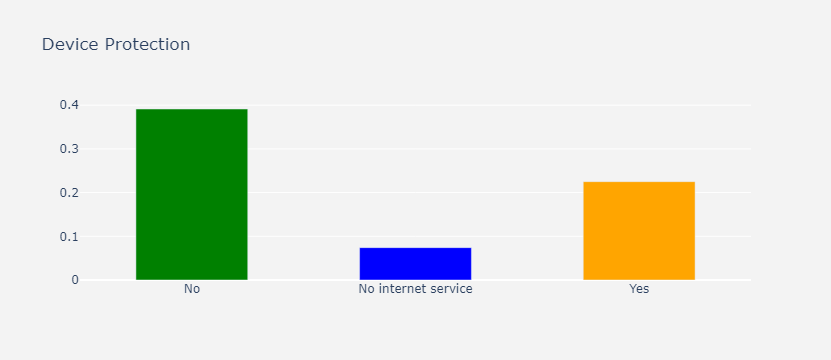

In [20]:
df_plot = df_data.groupby('DeviceProtection').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['DeviceProtection'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Device Protection',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

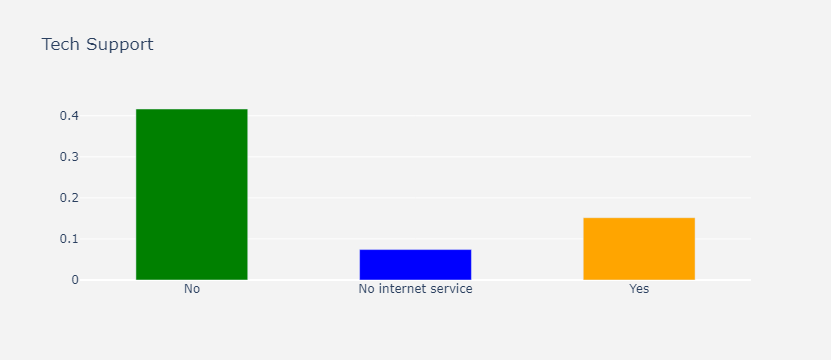

In [21]:
df_plot = df_data.groupby('TechSupport').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['TechSupport'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Tech Support',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

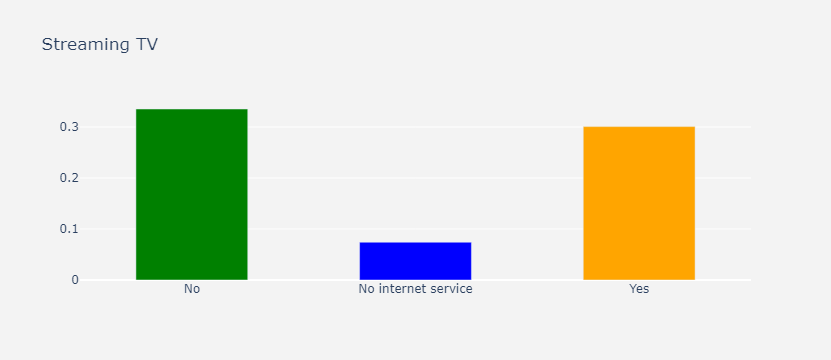

In [22]:
df_plot = df_data.groupby('StreamingTV').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['StreamingTV'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Streaming TV',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

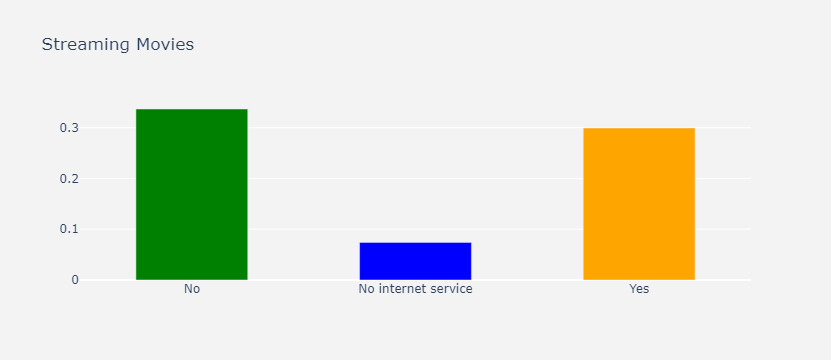

In [23]:
df_plot = df_data.groupby('StreamingMovies').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['StreamingMovies'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Streaming Movies',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

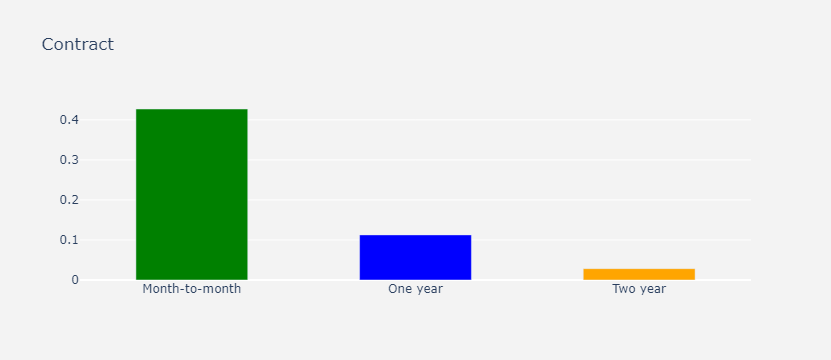

In [24]:
df_plot = df_data.groupby('Contract').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['Contract'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Contract',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

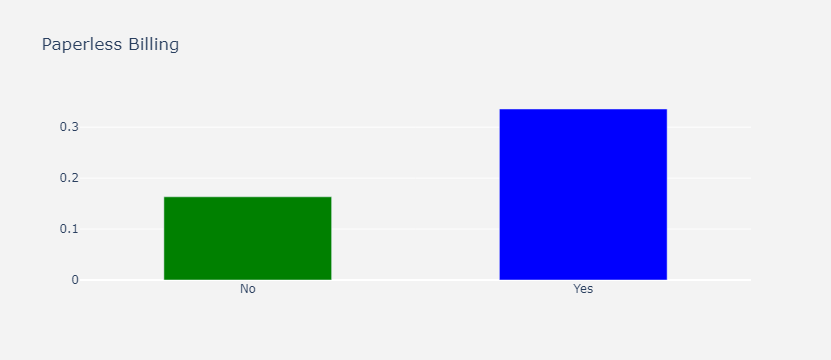

In [25]:
df_plot = df_data.groupby('PaperlessBilling').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['PaperlessBilling'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Paperless Billing',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

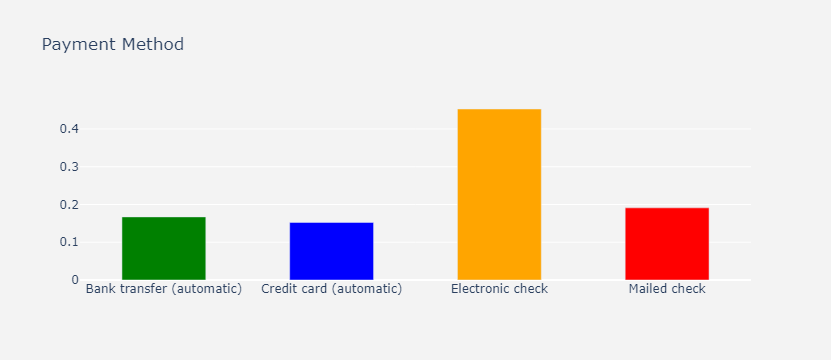

In [26]:
df_plot = df_data.groupby('PaymentMethod').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['PaymentMethod'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category"},
        title='Payment Method',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [27]:
df_data.tenure.describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

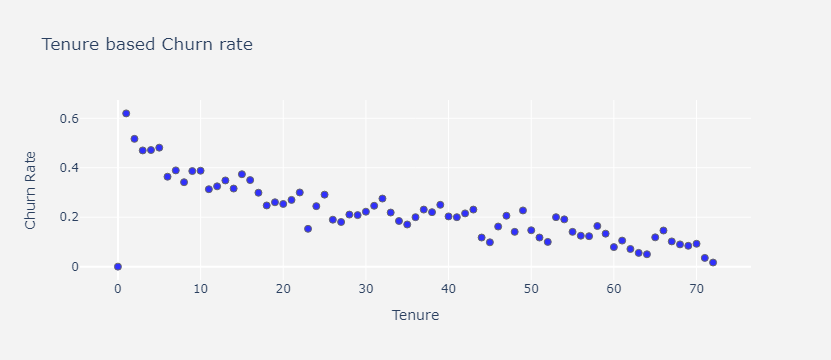

In [28]:
df_plot = df_data.groupby('tenure').Churn.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['tenure'],
        y=df_plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Tenure"},
        title='Tenure based Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [29]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

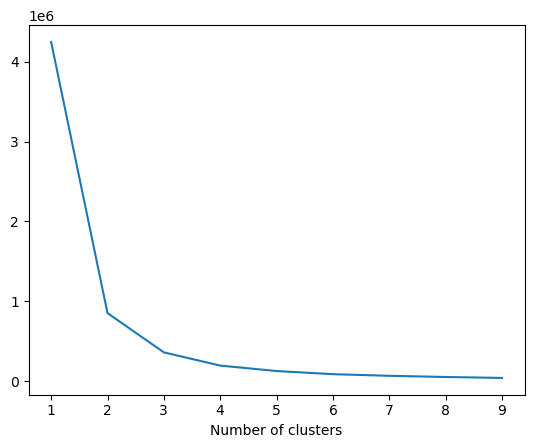

In [30]:
sse = {}
df_cluster = df_data[['tenure']].copy()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df_cluster)
    df_cluster.loc[:, "clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [31]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df_data[['tenure']])
df_data['TenureCluster'] = kmeans.predict(df_data[['tenure']])

In [32]:
df_data = order_cluster('TenureCluster', 'tenure',df_data,True)

In [33]:
df_data.groupby('TenureCluster').tenure.describe()

count       mean       std   min   25%   50%   75%   max
TenureCluster                                                           
0              2878.0   7.512509  5.977337   0.0   2.0   6.0  12.0  20.0
1              1926.0  33.854102  8.208706  21.0  26.0  34.0  41.0  48.0
2              2239.0  63.048682  7.478229  49.0  56.0  64.0  70.0  72.0

In [34]:
df_data['TenureCluster'] = df_data["TenureCluster"].replace({0:'Low',1:'Mid',2:'High'})

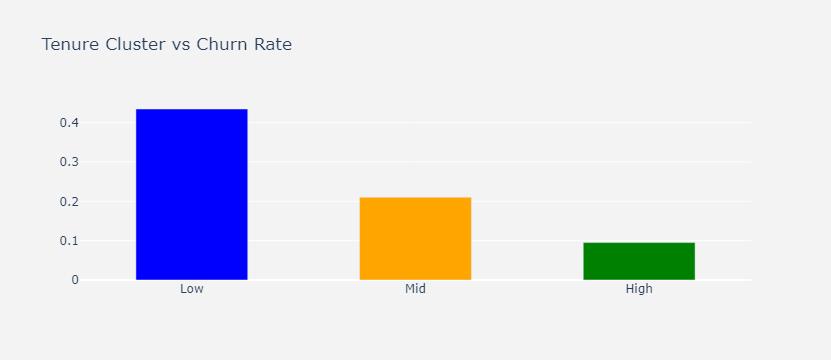

In [35]:
df_plot = df_data.groupby('TenureCluster').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['TenureCluster'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5,0.5],
        marker=dict(
        color=['green', 'blue', 'orange','red'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High']},
        title='Tenure Cluster vs Churn Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

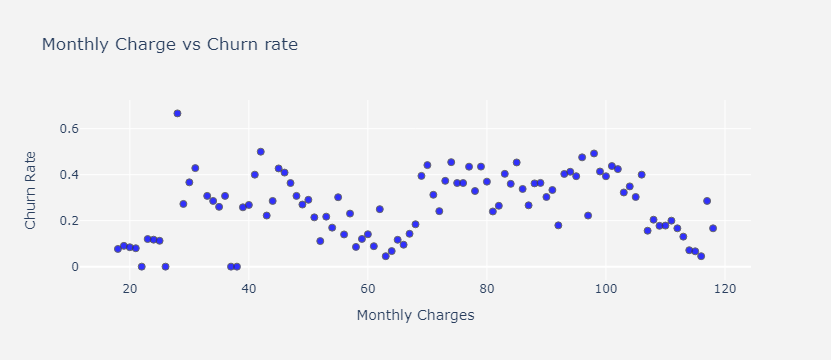

In [36]:
df_plot = df_data.copy()
df_plot['MonthlyCharges'] = df_plot['MonthlyCharges'].astype(int)
df_plot = df_plot.groupby('MonthlyCharges').Churn.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['MonthlyCharges'],
        y=df_plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Monthly Charges"},
        title='Monthly Charge vs Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

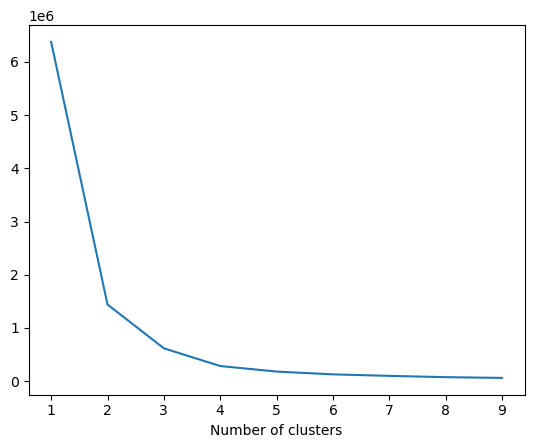

In [37]:
sse={}
df_cluster = df_data[['MonthlyCharges']].copy()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df_cluster)
    df_cluster.loc[:,"clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [38]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df_data[['MonthlyCharges']])
df_data['MonthlyChargeCluster'] = kmeans.predict(df_data[['MonthlyCharges']])

In [39]:
df_data = order_cluster('MonthlyChargeCluster', 'MonthlyCharges',df_data,True)

In [40]:
df_data.groupby('MonthlyChargeCluster').MonthlyCharges.describe()

count       mean        std    min    25%    50%  \
MonthlyChargeCluster                                                      
0                     1892.0  23.384619   5.660437  18.25  19.80  20.40   
1                     2239.0  61.628808  10.441432  42.60  51.80  61.55   
2                     2912.0  94.054258  10.343944  77.85  85.05  93.90   

                           75%     max  
MonthlyChargeCluster                    
0                      25.0500   42.40  
1                      70.7000   77.80  
2                     101.9125  118.75

In [41]:
df_data['MonthlyChargeCluster'] = df_data["MonthlyChargeCluster"].replace({0:'Low',1:'Mid',2:'High'})

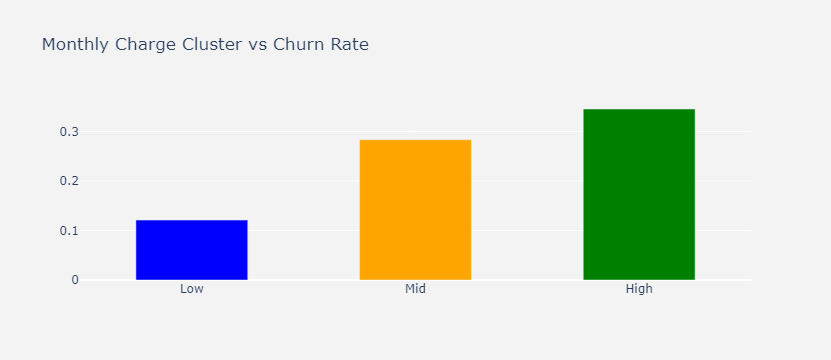

In [42]:
df_plot = df_data.groupby('MonthlyChargeCluster').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['MonthlyChargeCluster'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High']},
        title='Monthly Charge Cluster vs Churn Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [43]:
df_data[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull()]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
91    3115-CZMZD    Male              0      No        Yes       0   
136   4367-NUYAO    Male              0     Yes        Yes       0   
416   7644-OMVMY    Male              0     Yes        Yes       0   
478   3213-VVOLG    Male              0     Yes        Yes       0   
556   2520-SGTTA  Female              0     Yes        Yes       0   
668   2923-ARZLG    Male              0     Yes        Yes       0   
1976  4472-LVYGI  Female              0     Yes        Yes       0   
2114  1371-DWPAZ  Female              0     Yes        Yes       0   
2995  4075-WKNIU  Female              0     Yes        Yes       0   
3008  2775-SEFEE    Male              0      No        Yes       0   
4249  5709-LVOEQ  Female              0     Yes        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
91            Yes                No              No  No internet service  ...   
136           Yes               Yes              No  No internet service  ...   
416           Yes                No              No  No internet service  ...   
478           Yes               Yes              No  No internet service  ...   
556           Yes                No              No  No internet service  ...   
668           Yes                No              No  No internet service  ...   
1976           No  No phone service             DSL                  Yes  ...   
2114           No  No phone service             DSL                  Yes  ...   
2995          Yes               Yes             DSL                   No  ...   
3008          Yes               Yes             DSL                  Yes  ...   
4249          Yes                No             DSL                  Yes  ...   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
91    No internet service  No internet service  Two year               No   
136   No internet service  No internet service  Two year               No   
416   No internet service  No internet service  Two year               No   
478   No internet service  No internet service  Two year               No   
556   No internet service  No internet service  Two year               No   
668   No internet service  No internet service  One year              Yes   
1976                  Yes                   No  Two year              Yes   
2114                  Yes                   No  Two year               No   
2995                  Yes                   No  Two year               No   
3008                   No                   No  Two year              Yes   
4249                  Yes                  Yes  Two year               No   

                  PaymentMethod MonthlyCharges TotalCharges Churn  \
91                 Mailed check          20.25                  0   
136                Mailed check          25.75                  0   
416                Mailed check          19.85                  0   
478                Mailed check          25.35                  0   
556                Mailed check          20.00                  0   
668                Mailed check          19.70                  0   
1976  Bank transfer (automatic)          52.55                  0   
2114    Credit card (automatic)          56.05                  0   
2995               Mailed check          73.35                  0   
3008  Bank transfer (automatic)          61.90                  0   
4249               Mailed check          80.85                  0   

      TenureCluster MonthlyChargeCluster  
91              Low                  Low  
136             Low                  Low  
416             Low                  Low  
478             Low                  Low  
556             Low                  Low  
668             Low                  Low  
1976            Low                  Mid  
2114            Low                  Mid  
2995            Low                  Mid  
3008    

In [44]:
len(df_data[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull()])

11

In [45]:
df_data.loc[pd.to_numeric(df_data['TotalCharges'], errors='coerce').isnull(),'TotalCharges'] = np.nan

In [46]:
df_data = df_data.dropna()

In [47]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'], errors='coerce')

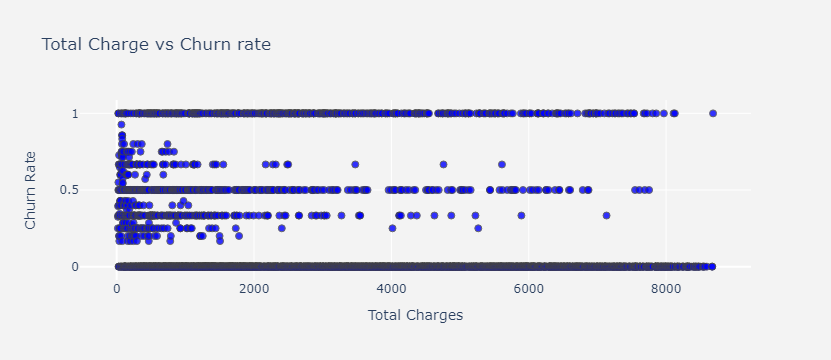

In [48]:
df_plot = df_data.copy()
df_plot['TotalCharges'] = df_plot['TotalCharges'].astype(int)
df_plot = df_plot.groupby('TotalCharges').Churn.mean().reset_index()


plot_data = [
    go.Scatter(
        x=df_plot['TotalCharges'],
        y=df_plot['Churn'],
        mode='markers',
        name='Low',
        marker= dict(size= 7,
            line= dict(width=1),
            color= 'blue',
            opacity= 0.8
           ),
    )
]

plot_layout = go.Layout(
        yaxis= {'title': "Churn Rate"},
        xaxis= {'title': "Total Charges"},
        title='Total Charge vs Churn rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

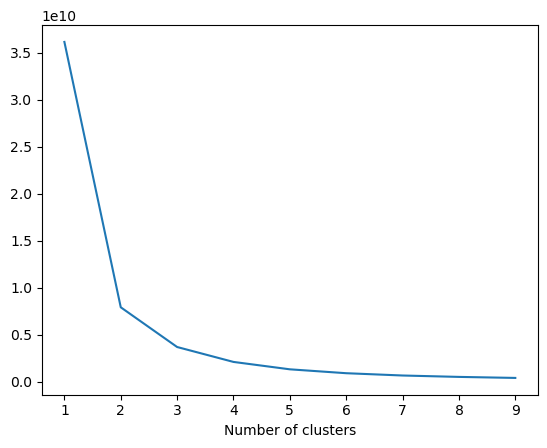

In [49]:
sse={}
df_cluster = df_data[['TotalCharges']].copy()

for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, n_init=10).fit(df_cluster)
    df_cluster.loc[:, "clusters"] = kmeans.labels_
    sse[k] = kmeans.inertia_ 

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of clusters")
plt.show()

In [50]:
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(df_data[['TotalCharges']])
df_data['TotalChargeCluster'] = kmeans.predict(df_data[['TotalCharges']])

In [51]:
df_data = order_cluster('TotalChargeCluster', 'TotalCharges',df_data,True)

In [52]:
df_data.groupby('TotalChargeCluster').TotalCharges.describe()

count         mean          std     min        25%  \
TotalChargeCluster                                                        
0                   4141.0   680.343625   566.738920    18.8   160.8000   
1                   1611.0  3237.856983   808.740993  1951.0  2514.9000   
2                   1280.0  6267.717305  1014.148805  4740.0  5437.5875   

                        50%        75%      max  
TotalChargeCluster                               
0                    531.60  1130.8500  1949.40  
1                   3181.80  3943.4750  4738.85  
2                   6130.25  7030.8125  8684.80

In [53]:
df_data['TotalChargeCluster'] = df_data["TotalChargeCluster"].replace({0:'Low',1:'Mid',2:'High'})

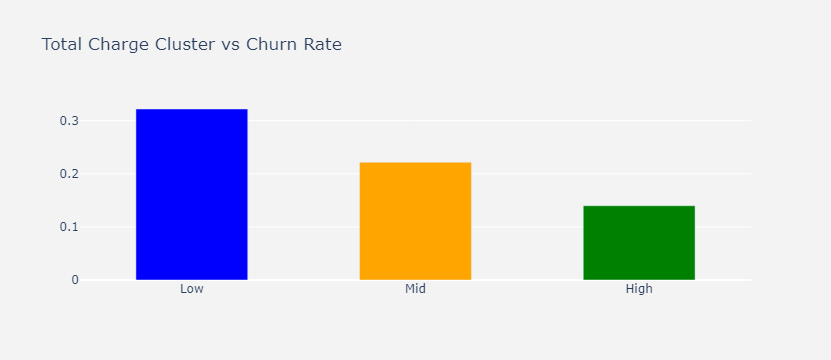

In [54]:
df_plot = df_data.groupby('TotalChargeCluster').Churn.mean().reset_index()
plot_data = [
    go.Bar(
        x=df_plot['TotalChargeCluster'],
        y=df_plot['Churn'],
        width = [0.5, 0.5, 0.5],
        marker=dict(
        color=['green', 'blue', 'orange'])
    )
]

plot_layout = go.Layout(
        xaxis={"type": "category","categoryarray":['Low','Mid','High']},
        title='Total Charge Cluster vs Churn Rate',
        plot_bgcolor  = "rgb(243,243,243)",
        paper_bgcolor  = "rgb(243,243,243)",
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [55]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   customerID            7032 non-null   object 
 1   gender                7032 non-null   object 
 2   SeniorCitizen         7032 non-null   int64  
 3   Partner               7032 non-null   object 
 4   Dependents            7032 non-null   object 
 5   tenure                7032 non-null   int64  
 6   PhoneService          7032 non-null   object 
 7   MultipleLines         7032 non-null   object 
 8   InternetService       7032 non-null   object 
 9   OnlineSecurity        7032 non-null   object 
 10  OnlineBackup          7032 non-null   object 
 11  DeviceProtection      7032 non-null   object 
 12  TechSupport           7032 non-null   object 
 13  StreamingTV           7032 non-null   object 
 14  StreamingMovies       7032 non-null   object 
 15  Contract             

In [56]:
#import Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dummy_columns = [] #array for multiple value columns

for column in df_data.columns:
    if df_data[column].dtype == object and column != 'customerID':
        if df_data[column].nunique() == 2:
            #apply Label Encoder for binary ones
            df_data[column] = le.fit_transform(df_data[column]) 
        else:
            dummy_columns.append(column)

#apply get dummies for selected columns
df_data = pd.get_dummies(data = df_data,columns = dummy_columns) 

In [57]:
df_data[['gender','Partner','TenureCluster_High','TenureCluster_Low','TenureCluster_Mid']].head()

gender  Partner  TenureCluster_High  TenureCluster_Low  TenureCluster_Mid
0       0        1               False               True              False
1       0        0               False               True              False
2       1        0               False               True              False
3       1        0               False               True              False
4       1        1               False               True              False

In [58]:
all_columns = []
for column in df_data.columns:
    column = column.replace(" ", "_").replace("(", "_").replace(")", "_").replace("-", "_")
    all_columns.append(column)

df_data.columns = all_columns

In [59]:
glm_columns = 'gender'

for column in df_data.columns:
    if column not in ['Churn','customerID','gender']:
        glm_columns = glm_columns + ' + ' + column

In [60]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
 

glm_model = smf.glm(formula='Churn ~ {}'.format(glm_columns), data=df_data, family=sm.families.Binomial())
res = glm_model.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                            GLM   Df Residuals:                     7002
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2900.2
Date:                Mon, 04 Dec 2023   Deviance:                       5800.4
Time:                        19:32:29   Pearson chi2:                 7.55e+03
No. Iterations:                   100   Pseudo R-squ. (CS):             0.2834
Covariance Type:            nonrobust                                         
                                                      coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------

In [61]:
np.exp(res.params)

Intercept                                          1.273736
MultipleLines_No[T.True]                           0.887191
MultipleLines_No_phone_service[T.True]             1.027590
MultipleLines_Yes[T.True]                          1.397149
InternetService_DSL[T.True]                        0.552351
InternetService_Fiber_optic[T.True]                2.798110
InternetService_No[T.True]                         0.824137
OnlineSecurity_No[T.True]                          1.379918
OnlineSecurity_No_internet_service[T.True]         0.824137
OnlineSecurity_Yes[T.True]                         1.120022
OnlineBackup_No[T.True]                            1.242631
OnlineBackup_No_internet_service[T.True]           0.824137
OnlineBackup_Yes[T.True]                           1.243764
DeviceProtection_No[T.True]                        1.152484
DeviceProtection_No_internet_service[T.True]       0.824137
DeviceProtection_Yes[T.True]                       1.341051
TechSupport_No[T.True]                  

In [62]:
#create feature set and labels
X = df_data.drop(['Churn','customerID'],axis=1)
y = df_data.Churn

In [63]:
#train and test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [64]:
#building the model
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.83
Accuracy of XGB classifier on test set: 0.81


In [65]:
y_pred = xgb_model.predict(X_test)

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       250
           1       0.70      0.59      0.64       102

    accuracy                           0.81       352
   macro avg       0.77      0.74      0.75       352
weighted avg       0.80      0.81      0.80       352



In [77]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Users/Downloads/Graphviz/bin/'

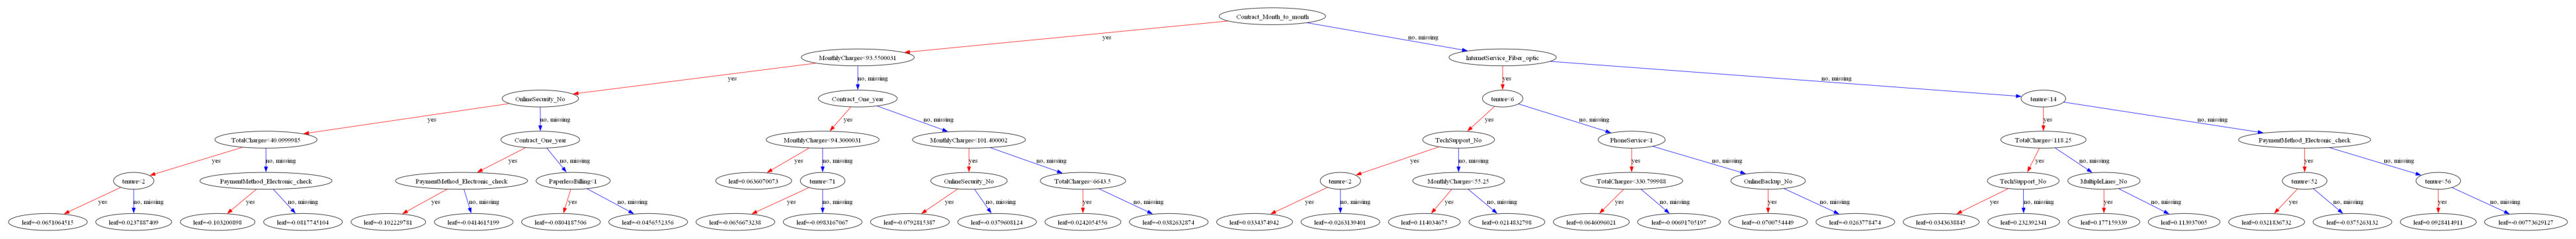

In [81]:
from xgboost import plot_tree

##set up the parameters
fig, ax = plt.subplots(figsize=(50,50))
plot_tree(xgb_model, ax=ax)

plt.show()

In [83]:
1/(1+np.exp(-0.032))

0.5079993174032311

In [85]:
from xgboost import plot_importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

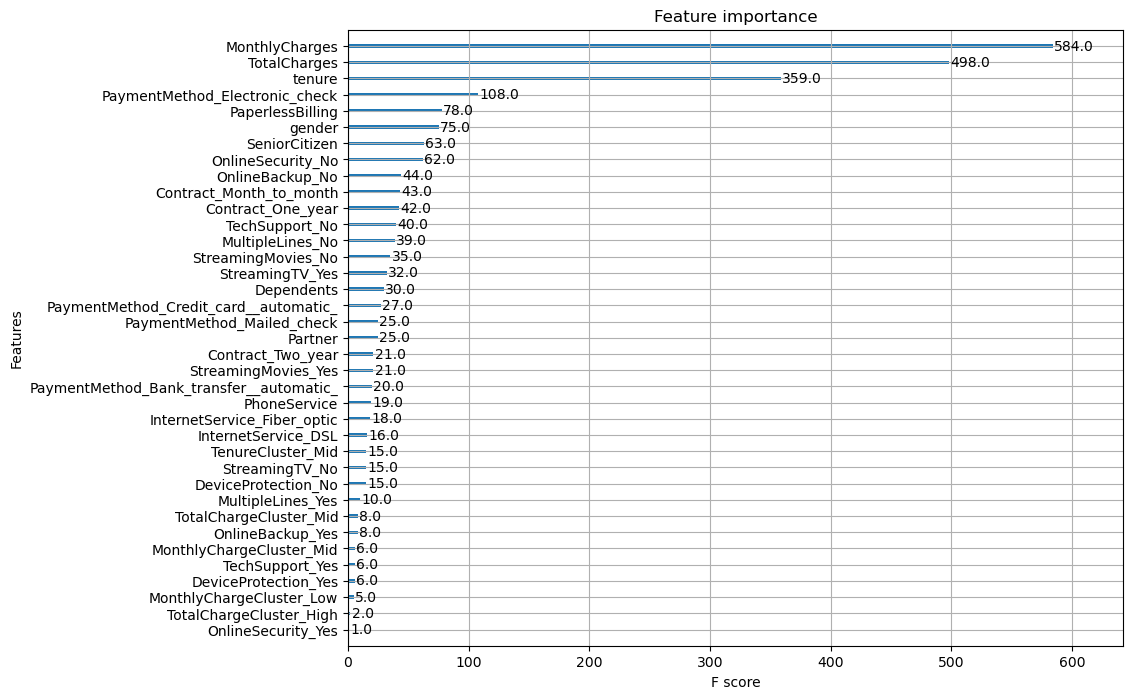

In [86]:
fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_model, ax=ax)

In [87]:
df_data['proba'] = xgb_model.predict_proba(df_data[X_train.columns])[:,1]

In [88]:
df_data[['customerID', 'proba']].head()

customerID     proba
0  7590-VHVEG  0.681058
1  6713-OKOMC  0.172883
2  7469-LKBCI  0.012180
3  8779-QRDMV  0.917634
4  1680-VDCWW  0.039231